In [1]:
import pandas as pd
import numpy as np
import requests
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.stats import shapiro

In [4]:
# Define the URL of the CSV file
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"

In [5]:
# Check if the file already exists
if os.path.exists("laptops.csv"):
  print("laptops.csv already exists. Download canceled.")
else:
  # Download the file using requests (more secure and integrated)  
  response = requests.get(url)

  # Check for successful download
  if response.status_code == 200:
    # Write the data to a local CSV file
    with open("laptops.csv", "wb") as f:
      f.write(response.content)
    print("laptops.csv downloaded successfully!")
  else:
    print(f"Error downloading file: {response.status_code}")

laptops.csv already exists. Download canceled.


In [6]:
df = pd.read_csv('laptops.csv')

In [7]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [10]:
# Use only the specified columns
df = df[['ram', 'storage', 'screen', 'final_price']]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


# EDA

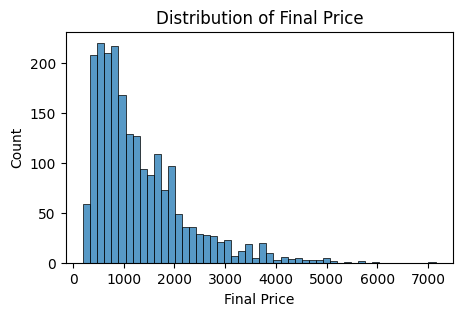

Skewness: 1.6495877663192549


In [12]:
# Create a histogram
plt.figure(figsize=(5, 3))
sns.histplot(df['final_price'], bins=50)
plt.title('Distribution of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Count')
plt.show()

# Calculate skewness
skewness = df['final_price'].skew()
print(f'Skewness: {skewness}')

The provided histogram shows the distribution of the `final_price` variable. As you can see, the distribution has a clear **long tail** extending to the right. This indicates that there are a few very high-priced laptops (the tail), while most laptops are priced within a certain range (the main body of the distribution).

The skewness value of 1.6496 further confirms this observation. A positive skewness indicates a long tail to the right, which is consistent with the histogram.

This long-tailed distribution might suggest that there are some premium or luxury laptops that are significantly more expensive than the majority of laptops in the dataset.


In [13]:
stat, p = shapiro(df['final_price'])
print(f'Statistics={stat}, p-value={p}')

if p > 0.05:
    print("Data follows normal distribution")
else:
    print("Data does not follow normal distribution")


Statistics=0.8532061559572949, p-value=6.76218720564138e-41
Data does not follow normal distribution


**Question 1**: Feature with missing values

In [14]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [15]:
# Count the number of empty values in each column
missing_values = df.isnull().sum()

# Display columns with more than 0
columns_with_missing_values = missing_values[missing_values > 0]

# Print the results with a better format
print(f"Columns with missing values are: {columns_with_missing_values.index.tolist()}")

Columns with missing values are: ['screen']


**Question 2**: Median for `ram`

In [16]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [17]:
print(f"The median (50% percentile) for variable 'ram' is {df['ram'].median()}")

The median (50% percentile) for variable 'ram' is 16.0


Prepare and split the dataset

In [18]:
df.shape

(2160, 4)

In [19]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [20]:
n

2160

In [21]:
n_val, n_test, n_train

(432, 432, 1296)

In [22]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [23]:
idx = np.arange(n)

In [24]:
np.random.seed(42)
np.random.shuffle(idx)

In [25]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [26]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [27]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
# Store the original final_price values
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

# Assign original values to y_train, y_val, and y_test
y_train = y_train_orig
y_val = y_val_orig
y_test = y_test_orig

# Remove final_price from DataFrames
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

# Apply log transformation to the target variable
y_train_log = np.log1p(y_train_orig)
y_val_log = np.log1p(y_val_orig)
y_test_log = np.log1p(y_test_orig)

In [30]:
len(y_train)

1296

In [31]:
len(y_train_log)

1296

**Question 3**: Mean vs zero

In [32]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [33]:
# Calculate the mean of the 'screen' column
mean = df_train.screen.mean()

# Prepare the training data and calculate RMSE with fillna_value as mean (no log)
X_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred_mean = w_0_mean + X_val.dot(w_mean)

rmse_mean = rmse(y_val, y_pred_mean)
print(f"Filled with mean (no-log): {rmse_mean}")

# Prepare the training data and calculate RMSE with fillna_value as 0 (no log)
X_train_zero = prepare_X(df_train, fillna_value=0)
w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

X_val_zero = prepare_X(df_val, fillna_value=0)
y_pred_zero = w_0_zero + X_val_zero.dot(w_zero)

rmse_zero = rmse(y_val, y_pred_zero)
print(f"Filled with 0 (no-log): {rmse_zero}")

# Compare RMSE values and print the appropriate message (no log)
if rmse_zero < rmse_mean:
    print(f"Missing values 'filled with 0' (no-log) because it has a smaller RMSE of {rmse_zero}.\n")
else:
    print(f"Missing values 'filled with mean' (no-log) because it has a smaller RMSE of {rmse_mean}.\n")

# Calculate RMSE for log-transformed data

# Prepare the training data and calculate RMSE with fillna_value as mean (with log)
X_train_log = prepare_X(df_train, fillna_value=mean)
w_0_mean_log, w_mean_log = train_linear_regression(X_train_log, y_train_log)

X_val_log = prepare_X(df_val, fillna_value=mean)
y_pred_mean_log = w_0_mean_log + X_val_log.dot(w_mean_log)

rmse_mean_log = rmse(y_val_log, y_pred_mean_log)
print(f"Filled with mean (with-log): {rmse_mean_log}")

# Prepare the training data and calculate RMSE with fillna_value as 0 (with log)
X_train_zero_log = prepare_X(df_train, fillna_value=0)
w_0_zero_log, w_zero_log = train_linear_regression(X_train_zero_log, y_train_log)

X_val_zero_log = prepare_X(df_val, fillna_value=0)
y_pred_zero_log = w_0_zero_log + X_val_zero_log.dot(w_zero_log)

rmse_zero_log = rmse(y_val_log, y_pred_zero_log)
print(f"Filled with 0 (with-log): {rmse_zero_log}")

# Compare RMSE values and print the appropriate message (with log)
if rmse_zero_log < rmse_mean_log:
    print(f"Missing values 'filled with 0' (with-log) because it has a smaller RMSE of {rmse_zero_log}.")
else:
    print(f"Missing values 'filled with mean' (with-log) because it has a smaller RMSE of {rmse_mean_log}.")


Filled with mean (no-log): 600.2650313748429
Filled with 0 (no-log): 597.3635593619622
Missing values 'filled with 0' (no-log) because it has a smaller RMSE of 597.3635593619622.

Filled with mean (with-log): 0.4311767801693919
Filled with 0 (with-log): 0.4288635315474416
Missing values 'filled with 0' (with-log) because it has a smaller RMSE of 0.4288635315474416.


**Question 4**: Regularization

In [34]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [35]:
# Fill missing values with 0 in the training and validation sets
X_train = prepare_X(df_train, fillna_value=0)  # Prepare training data with 0 fill
X_val = prepare_X(df_val, fillna_value=0)      # Prepare validation data with 0 fill

In [36]:
# Initialize variables to track the minimum RMSE and corresponding r for both log and non-log cases
min_rmse_log = float('inf')
best_r_log = None

min_rmse_no_log = float('inf')
best_r_no_log = None

print("\nNo-log transformation:")
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    
    # Print the current r and its RMSE value
    print('%06s %0.5f' % (r, rmse_val))

    # Check if the current RMSE is smaller than the minimum RMSE found so far
    if rmse_val < min_rmse_no_log:
        min_rmse_no_log = rmse_val
        best_r_no_log = r

# Print the best r and its corresponding minimum RMSE value for no log
print(f"Best regularization parameter (r) no-log transformation is {best_r_no_log} with smallest RMSE of {min_rmse_no_log:.7f}\n")

print("\nWith-log transformation:")
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train_log, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val_log, y_pred)
    
    # Print the current r and its RMSE value
    print('%06s %0.5f' % (r, rmse_val))

    # Check if the current RMSE is smaller than the minimum RMSE found so far
    if rmse_val < min_rmse_log:
        min_rmse_log = rmse_val
        best_r_log = r

# Print the best r and its corresponding minimum RMSE value for log transformation
print(f"Best regularization parameter (r) with-log transformation is {best_r_log} with smallest RMSE of {min_rmse_log}\n")



No-log transformation:
     0 597.36356
 1e-06 597.36356
0.0001 597.36354
 0.001 597.36337
  0.01 597.36168
   0.1 597.34516
     1 597.21212
     5 597.01112
    10 597.05877
Best regularization parameter (r) no-log transformation is 5 with smallest RMSE of 597.0111186


With-log transformation:
     0 0.42886
 1e-06 0.42886
0.0001 0.42886
 0.001 0.42886
  0.01 0.42885
   0.1 0.42878
     1 0.43059
     5 0.46321
    10 0.50757
Best regularization parameter (r) with-log transformation is 0.1 with smallest RMSE of 0.42877560097076456



**Question 5**: Standard deviation of RMSE

In [37]:
rmses_no_log = []
rmses_log = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.final_price.values
    y_val_orig = df_val.final_price.values
    y_test_orig = df_test.final_price.values

    # Case 1: Without log transformation
    y_train_no_log = y_train_orig
    y_val_no_log = y_val_orig
    y_test_no_log = y_test_orig

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    # Train and evaluate without log transformation
    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_train, y_train_no_log)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred_no_log = w_0 + X_val.dot(w)

    result_no_log = rmse(y_val_no_log, y_pred_no_log)
    rmses_no_log.append(result_no_log)

    # Case 2: With log transformation
    y_train_log = np.log1p(y_train_orig)
    y_val_log = np.log1p(y_val_orig)
    y_test_log = np.log1p(y_test_orig)

    # Train and evaluate with log transformation
    w_0, w = train_linear_regression(X_train, y_train_log)
    y_pred_log = w_0 + X_val.dot(w)
    
    # Apply inverse transformation (expm1) to predictions and calculate RMSE
    y_pred_log = np.expm1(y_pred_log)
    result_log = rmse(np.expm1(y_val_log), y_pred_log)
    rmses_log.append(result_log)

    # Print RMSE for each seed
    print(f"Seed {s}: RMSE no-log = {result_no_log:.5f}, RMSE with-log = {result_log:.5f}")

# Calculate and print the standard deviation of RMSE for both cases
std_no_log = np.std(rmses_no_log)
std_log = np.std(rmses_log)

print(f"\nStandard deviation of RMSE no-log: {round(std_no_log, 3)}")
print(f"Standard deviation of RMSE with-log: {round(std_log, 3)}")


Seed 0: RMSE no-log = 565.45209, RMSE with-log = 892.14583
Seed 1: RMSE no-log = 636.79854, RMSE with-log = 2518.90531
Seed 2: RMSE no-log = 588.95587, RMSE with-log = 2530.82844
Seed 3: RMSE no-log = 597.81489, RMSE with-log = 963.57047
Seed 4: RMSE no-log = 571.96279, RMSE with-log = 869.16994
Seed 5: RMSE no-log = 573.23833, RMSE with-log = 956.67579
Seed 6: RMSE no-log = 647.34383, RMSE with-log = 2515.84015
Seed 7: RMSE no-log = 550.43982, RMSE with-log = 914.78899
Seed 8: RMSE no-log = 587.33350, RMSE with-log = 834.00840
Seed 9: RMSE no-log = 576.10179, RMSE with-log = 716.99413

Standard deviation of RMSE no-log: 29.176
Standard deviation of RMSE with-log: 756.079


**Question 6**: RMSE for Test

In [38]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

# Function to handle both log and no-log cases
def calculate_rmse(log_transform):
    if log_transform:
        y_train = np.log1p(y_train_orig)
        y_val = np.log1p(y_val_orig)
        y_test = np.log1p(y_test_orig)
    else:
        y_train = y_train_orig
        y_val = y_val_orig
        y_test = y_test_orig

    # Prepare data for training
    X_full_train = prepare_X(df_full_train, fillna_value=0)
    y_full_train = np.concatenate([y_train, y_val])

    # Train regularized linear regression model
    w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

    # Prepare test data
    X_test = prepare_X(df_test, fillna_value=0)
    y_pred_log = w_0 + X_test.dot(w)

    # If log transformation was applied, inverse the transformation for predictions
    if log_transform:
        y_pred = np.expm1(y_pred_log)  # Inverse of np.log1p
        y_test_true = np.expm1(y_test)  # Inverse of np.log1p on actual test data
    else:
        y_pred = y_pred_log
        y_test_true = y_test

    # Calculate RMSE
    result = rmse(y_test_true, y_pred)
    return result

# Calculate and print RMSE for log transformation (True)
result_log = calculate_rmse(log_transform=True)
result_log_str = str(result_log)
print(f"RMSE with-log transformation: {result_log_str[:result_log_str.find('.')+3]}")
#print(f"RMSE with log transformation: {result_log}")

# Calculate and print RMSE for no log transformation (False)
result_no_log = calculate_rmse(log_transform=False)
result_no_log_str = str(result_no_log)
print(f"RMSE no-log transformation: {result_no_log_str[:result_no_log_str.find('.')+3]}")
#print(f"RMSE without log transformation: {result_no_log}")


RMSE with-log transformation: 890.58
RMSE no-log transformation: 608.60
